# Dominando o Pandas: A Biblioteca preferida entre os Cientistas de Dados (Parte 2)
www.minerandodados.com.br
"Aprenda Data Science e Alavanque sua Carreira :) "

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns

In [2]:
dataset = pd.read_csv('/home/rodrigo/scripts/minerandodados/kc_house_data.csv', sep=',')

<IPython.core.display.Javascript object>


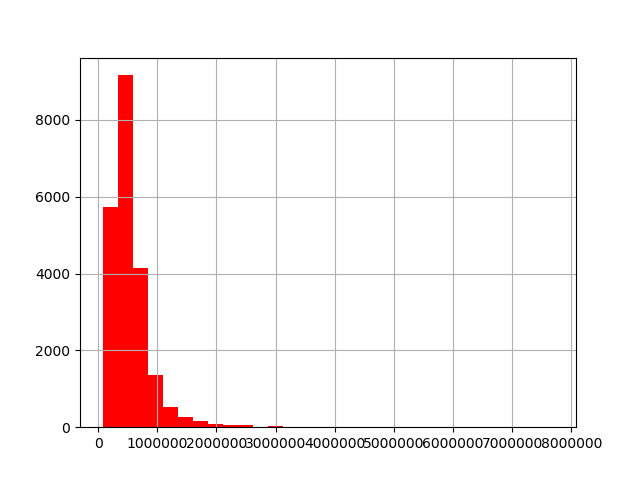

In [30]:
%matplotlib notebook
dataset['price'].hist(bins=30, color='red')

<IPython.core.display.Javascript object>


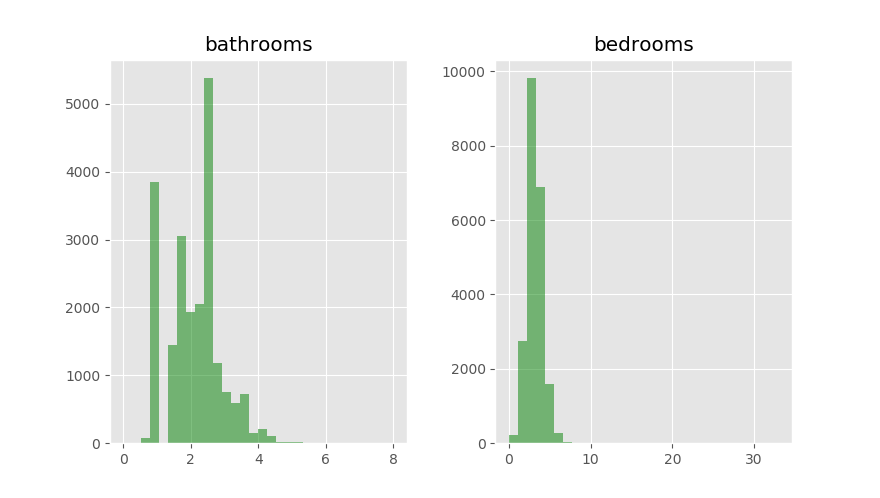

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b7440c588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f4b740cf7f0>]], dtype=object)

In [34]:
%matplotlib notebook
dataset[['bedrooms','bathrooms']].hist(bins=30,alpha=0.5,color='Green')

** Estatistica Descritiva**

In [59]:
dataset['bedrooms'].mean()

3.3709102688694523

In [33]:
dataset['bedrooms'].max()

33.0

In [34]:
dataset['bedrooms'].min()

0.0

In [38]:
dataset['bedrooms'].std()

0.9300844679399579

In [52]:
dataset['bedrooms'].skew()

1.9744391609000942

In [61]:
dataset.skew()

id                0.243329
price             4.024069
bedrooms          1.974439
bathrooms         0.511108
sqft_living       1.471555
sqft_lot         13.060019
floors            0.616107
waterfront       11.385108
view              3.395750
condition         1.032805
grade             0.771103
sqft_above        1.446664
sqft_basement     1.577965
yr_built         -0.469805
yr_renovated      4.549493
zipcode           0.405661
lat              -0.485270
long              0.885053
sqft_living15     1.108181
sqft_lot15        9.506743
dtype: float64

In [47]:
dataset['bedrooms'].describe()

count    21609.000000
mean         3.370910
std          0.930084
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

**Extraindo Insights**

<IPython.core.display.Javascript object>


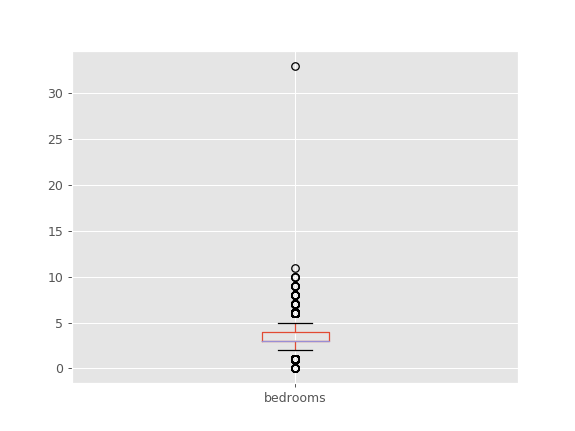

In [8]:
%matplotlib notebook
matplotlib.style.use('ggplot')
dataset.boxplot(column='bedrooms')

In [92]:
matplotlib.style.available

['seaborn-darkgrid',
 'seaborn-pastel',
 'fivethirtyeight',
 '_classic_test',
 'bmh',
 'seaborn-colorblind',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-poster',
 'seaborn-bright',
 'seaborn-ticks',
 'seaborn-whitegrid',
 'classic',
 'seaborn-dark-palette',
 'seaborn-muted',
 'seaborn',
 'dark_background',
 'seaborn-paper',
 'seaborn-white',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-dark']

<IPython.core.display.Javascript object>


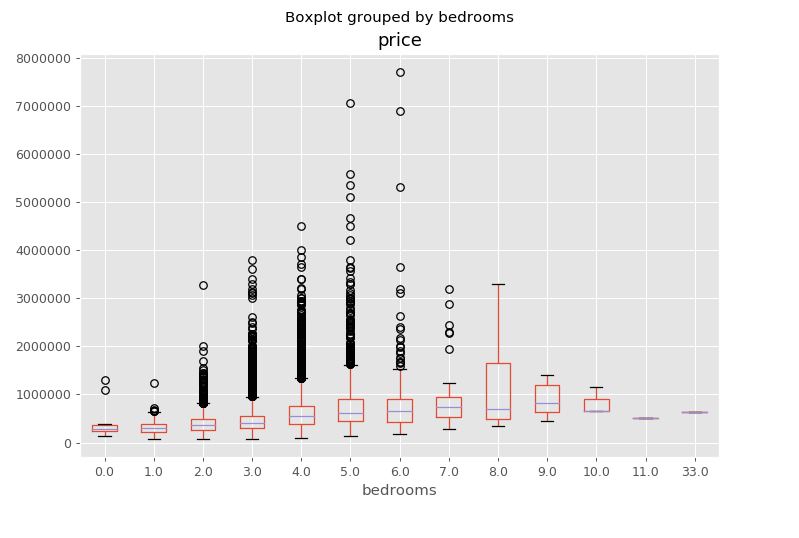

In [5]:
%matplotlib notebook
dataset.boxplot(column='price', by='bedrooms')

**Correlação **

In [ ]:
dataset.corr()

In [ ]:
dataset.corr('spearman')

In [18]:
dataset[['bedrooms','bathrooms','sqft_living','floors','waterfront','grade','price']].corr()

,bedrooms,bathrooms,sqft_living,floors,waterfront,grade,price
bedrooms,1.000000,0.515929,0.576679,0.175440,-0.006589,0.356972,0.308321
bathrooms,0.515929,1.000000,0.754665,0.500626,0.063744,0.664983,0.525138
sqft_living,0.576679,0.754665,1.000000,0.353922,0.103818,0.762704,0.702035
floors,0.175440,0.500626,0.353922,1.000000,0.023695,0.458171,0.256791
waterfront,-0.006589,0.063744,0.103818,0.023695,1.000000,0.082775,0.266369
grade,0.356972,0.664983,0.762704,0.458171,0.082775,1.000000,0.667434
price,0.308321,0.525138,0.702035,0.256791,0.266369,0.667434,1.000000


<IPython.core.display.Javascript object>


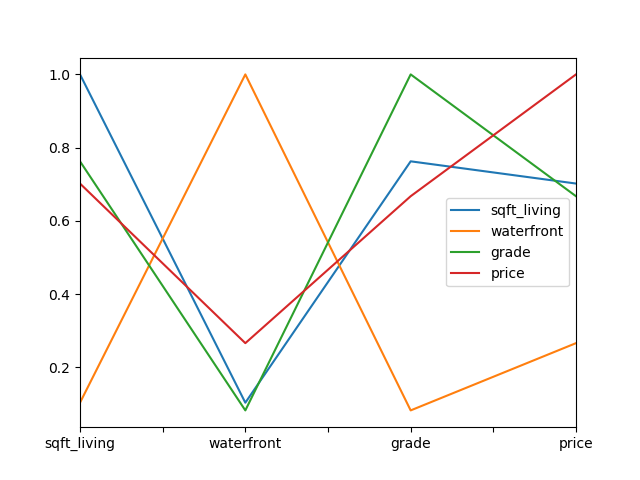

In [24]:
%matplotlib notebook
dataset[['sqft_living','waterfront','grade','price']].corr().plot()

In [46]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Tabelas Pivot**

In [76]:
dataset.pivot_table('id',index=["waterfront","floors"],aggfunc='count',margins=True)

id
waterfront floors         
0          1.0     10622.0
           1.5      1889.0
           2.0      8166.0
           2.5       159.0
           3.0       605.0
           3.5         8.0
1          1.0        57.0
           1.5        21.0
           2.0        75.0
           2.5         2.0
           3.0         8.0
All                21612.0

**Crosstab**

In [80]:
pd.crosstab(dataset['bedrooms'],dataset['condition'])

condition,1,2,3,4,5
bedrooms,,,,,
0.0,1,1,10,1,0
1.0,4,11,124,48,12
2.0,12,51,1779,717,200
3.0,8,69,6306,2711,728
4.0,4,36,4579,1682,580
5.0,0,1,1031,418,151
6.0,1,3,158,87,23
7.0,0,0,25,9,4
8.0,0,0,8,3,2


<IPython.core.display.Javascript object>


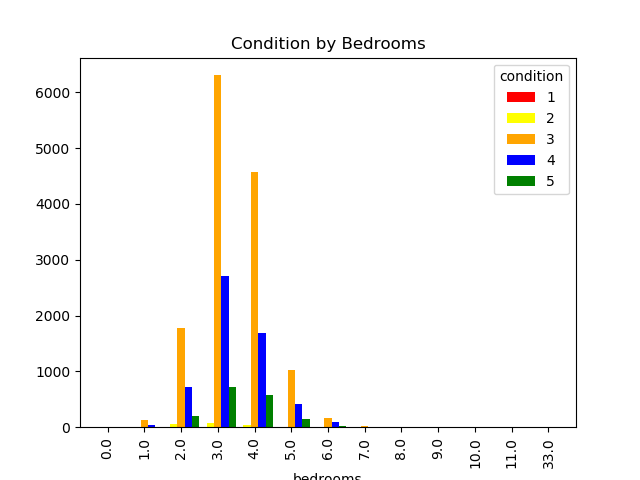

In [90]:
table = pd.crosstab(dataset['bedrooms'],dataset['condition'])
table.plot(kind='bar',width=1.0, color=['red','yellow','orange','blue','green'], title='Condition by Bedrooms' ,grid=False)

** Trabalhando com Excel **

In [33]:
dataframe_excel = pd.read_excel('/home/rodrigo/Downloads/Controle-de-Atividades-2.0.xlsx', sheetname=0,header=1)

In [34]:
dataframe_excel.head()

,N°,Atividade,Responsável,Estado Atual,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,Elaborar relatório de vendas,Antonio,ENCERRADA,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,Encerrar Balanço,Antonio,INICIADA,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,Preparar novo Plano de Contas,Pedro,ADIADA,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
4,NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [42]:
file = '/home/rodrigo/Downloads/Controle-de-Atividades-2.0.xlsx'
dataframe_excel = pd.read_excel(file, sheetname=0, header=1, index_col=3)

In [40]:
dataframe_excel.head()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Estado Atual,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA


In [41]:
dataframe_excel.sort_index()

,N°,Atividade,Responsável,Início,Previsão,Término,Duração Prev.,Duração Real,SITUAÇÃO,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
Estado Atual,,,,,,,,,,,,,,,,,,,
ADIADA,3.0,Preparar novo Plano de Contas,Pedro,2015-03-01 00:00:00,2015-03-20 00:00:00,NaT,1900-01-19 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,INICIADA
ENCERRADA,1.0,Elaborar relatório de vendas,Antonio,2015-03-01 12:20:00,2015-03-01 18:30:00,2015-03-05 07:30:00,06:10:00,1900-01-03 19:10:00,ATRASADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENCERRADA,4.0,Preparar reunião de resultados,Márcia,2015-03-02 00:00:00,2015-03-10 00:00:00,NaT,1900-01-08 00:00:00,NaT,ADIANTADA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIADA
INICIADA,2.0,Encerrar Balanço,Antonio,2015-03-01 07:00:00,2015-03-08 09:00:00,2015-03-08 09:00:00,1900-01-07 02:00:00,1900-01-07 02:00:00,EM DIA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SUSPENSA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENCERRADA
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaT,NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADIANTADA


** Gerando Planilhas **


In [33]:
dataset.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [43]:
colunas = ['id','price','bedrooms','bathrooms','sqft_living','floors','waterfront']
dataset[colunas].head()

,id,price,bedrooms,bathrooms,sqft_living,floors,waterfront
0,7129300520,221900.0,3.0,1.00,1180,1.0,0
1,6414100192,538000.0,3.0,2.25,2570,2.0,0
2,5631500400,180000.0,2.0,1.00,770,1.0,0
3,2487200875,604000.0,4.0,3.00,1960,1.0,0
4,1954400510,510000.0,3.0,2.00,1680,1.0,0


In [44]:
dataset[colunas].to_excel('planilha_pandas.xls',index=False)